# Análise exploratória de dados

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Descrição dos dados

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/atlantico-academy/datasets/main/titanic.csv")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2. Perguntas de partida e hipóteses

Pergunta 1: Quais são as taxas de sobrevivência por classe de bilhete?
Hipótese 1: Passageiros da primeira classe têm uma maior taxa de sobrevivência.

Pergunta 2: Existe uma correlação entre idade e sobrevivência?
Hipótese 2: Passageiros mais jovens têm uma maior taxa de sobrevivência.

Pergunta 3: Passageiros de uma certa faixa etária têm maior chance de sobrevivência?
Hipótese 3: Crianças têm uma maior chance de sobrevivência.

Pergunta 4: A quantidade de familiares a bordo influencia na sobrevivência?
Hipótese 4: Passageiros com menos familiares a bordo têm uma maior chance de sobrevivência.

## 3. Insights

In [71]:
palette = {0: "lightblue", 1: "blue"}

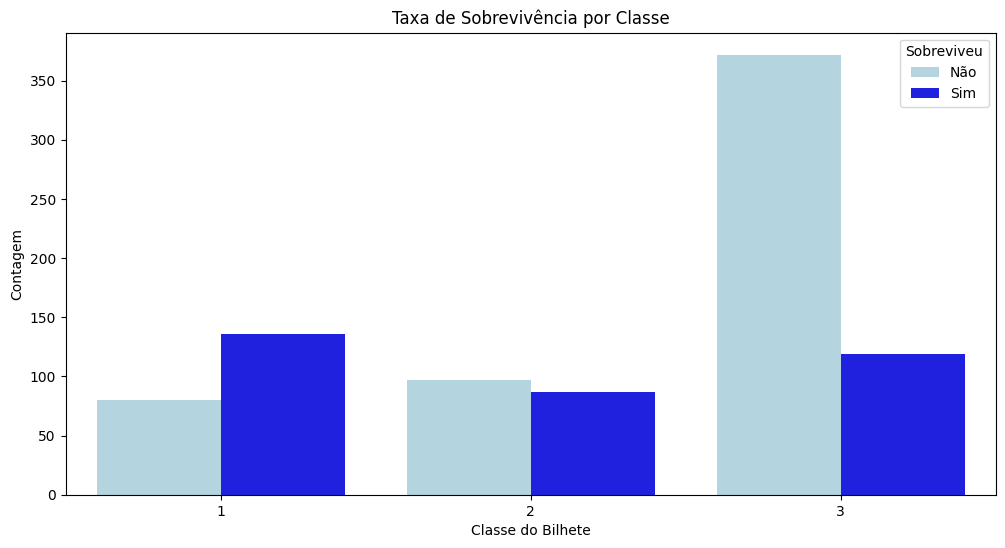

In [85]:
# Taxa de sobrevivência por classe do bilhete

plt.figure(figsize=(12, 6))
sns.countplot(x='pclass', hue='survived', data=df, palette=palette)
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe do Bilhete')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

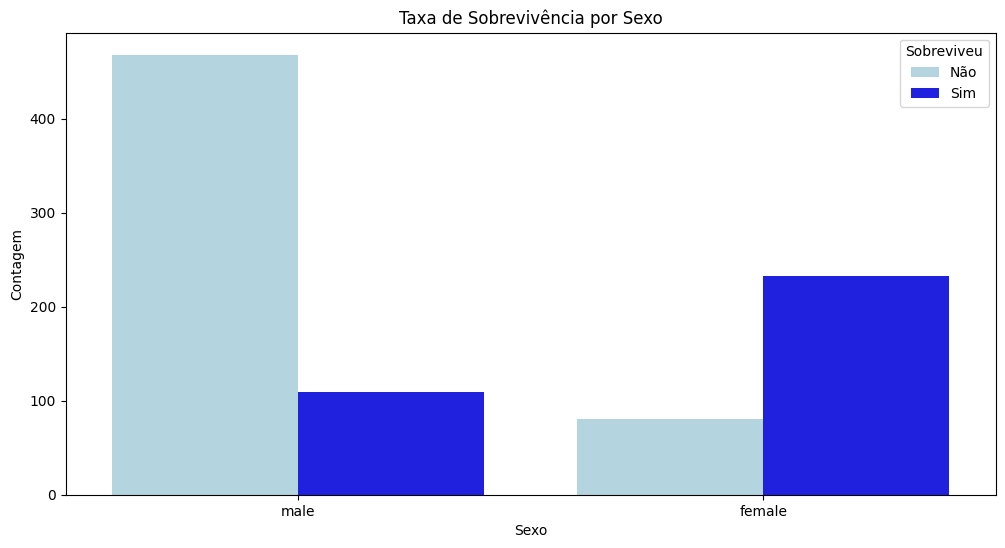

In [88]:
# Distribuição da Sobrevivência por Sexo

plt.figure(figsize=(12, 6))
sns.countplot(x='sex', hue='survived', data=df, palette=palette)
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

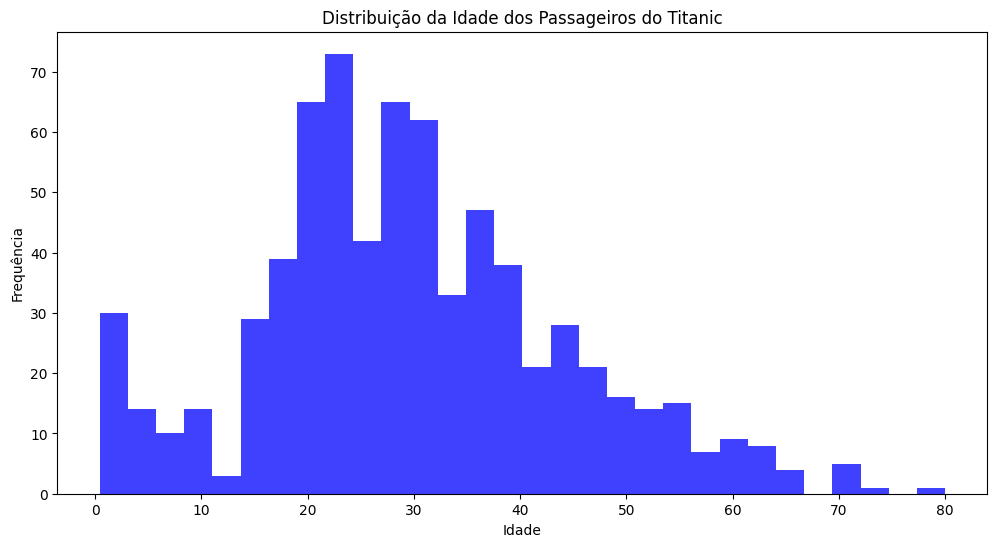

In [91]:
# Sobrevivência por Idade

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=30, kde=False, color='blue', edgecolor=None)
plt.title('Distribuição da Idade dos Passageiros do Titanic')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

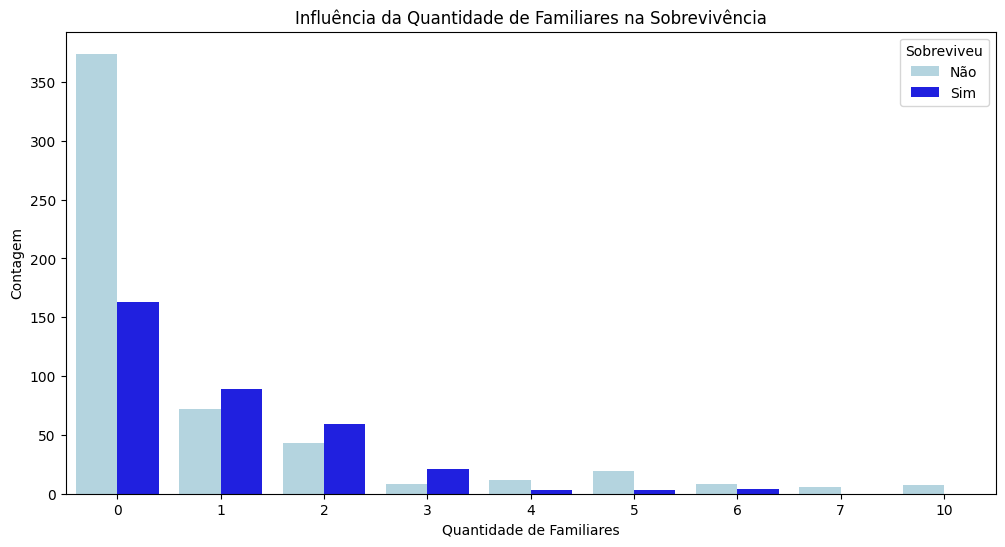

In [92]:
# Analisar a influência da quantidade de familiares a bordo na sobrevivência

df['family_size'] = df['sibsp'] + df['parch']
plt.figure(figsize=(12, 6))
sns.countplot(x='family_size', hue='survived', data=df, palette=palette)
plt.title('Influência da Quantidade de Familiares na Sobrevivência')
plt.xlabel('Quantidade de Familiares')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()

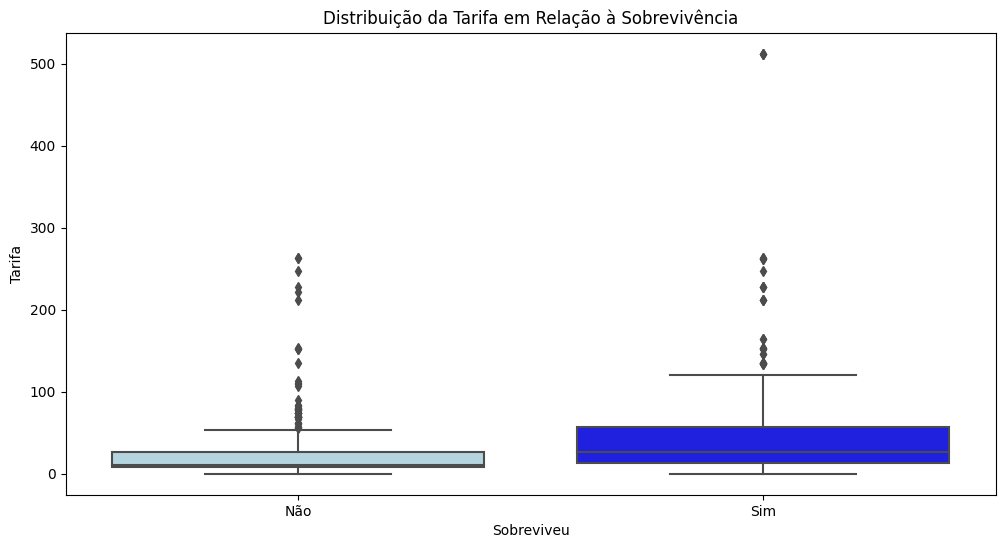

In [96]:
# Relação entre Tarifa e Sobrevivência

plt.figure(figsize=(12, 6))
sns.boxplot(x='survived', y='fare', data=df, palette=palette)
plt.title('Distribuição da Tarifa em Relação à Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Tarifa')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

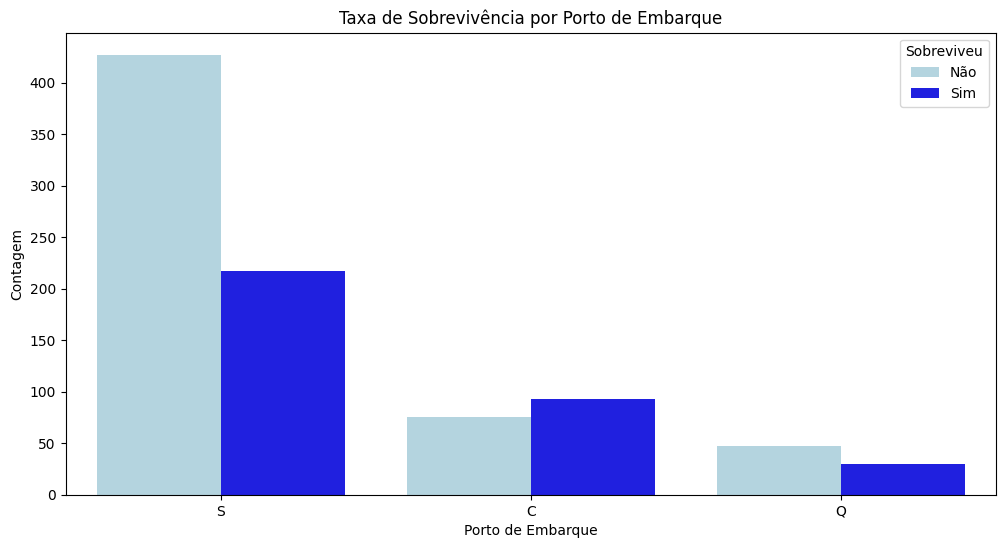

In [97]:
# Relação entre Porto de Embarque e Sobrevivência

plt.figure(figsize=(12, 6))
sns.countplot(x='embarked', hue='survived', data=df, palette=palette)
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', loc='upper right', labels=['Não', 'Sim'])
plt.show()